## Build CNN Model Using colab GPU

### *Project Fashion Classification*

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

### Load Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data() # returns into forms of tuples.
(X_train,y_train), (X_test,y_test) = fashion_mnist # Whole data assign to train & test data

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# here 1st is size of data(60,000 images), 2nd is rows, 3rd is columns
X_train.shape

(60000, 28, 28)

In [4]:
# here show labels(60,000) of images.
y_train.shape

(60000,)

In [5]:
# test data size
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
# note: value of array 0 = white & 255 = black
# show single image array of X_train dataset
print("show image in array -> \n",X_train[0])
print("Label of image is -> {} = Ankle boot ".format(y_train[0])) # 9 is label = Ankle boot

show image in array -> 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0  

In [7]:
# set image labels.
image_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

'''
0 = T-shirt/top
1 = Trouser
2 = Pullover
3 = Dress
4 = Coat
5 = Sandal
6 = Shirt
7 = Sneaker
8 = Bag
9 = Ankle boot
'''

'\n0 = T-shirt/top\n1 = Trouser\n2 = Pullover\n3 = Dress\n4 = Coat\n5 = Sandal\n6 = Shirt\n7 = Sneaker\n8 = Bag\n9 = Ankle boot\n'

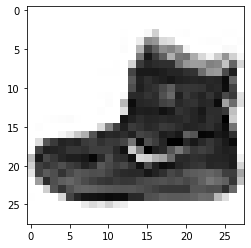

In [8]:
#Note: image resolution is low because high resolution image fetching more computation power.
# show first image of X_train dataset in GRAY color.
plt.imshow(X_train[0], cmap='Greys')

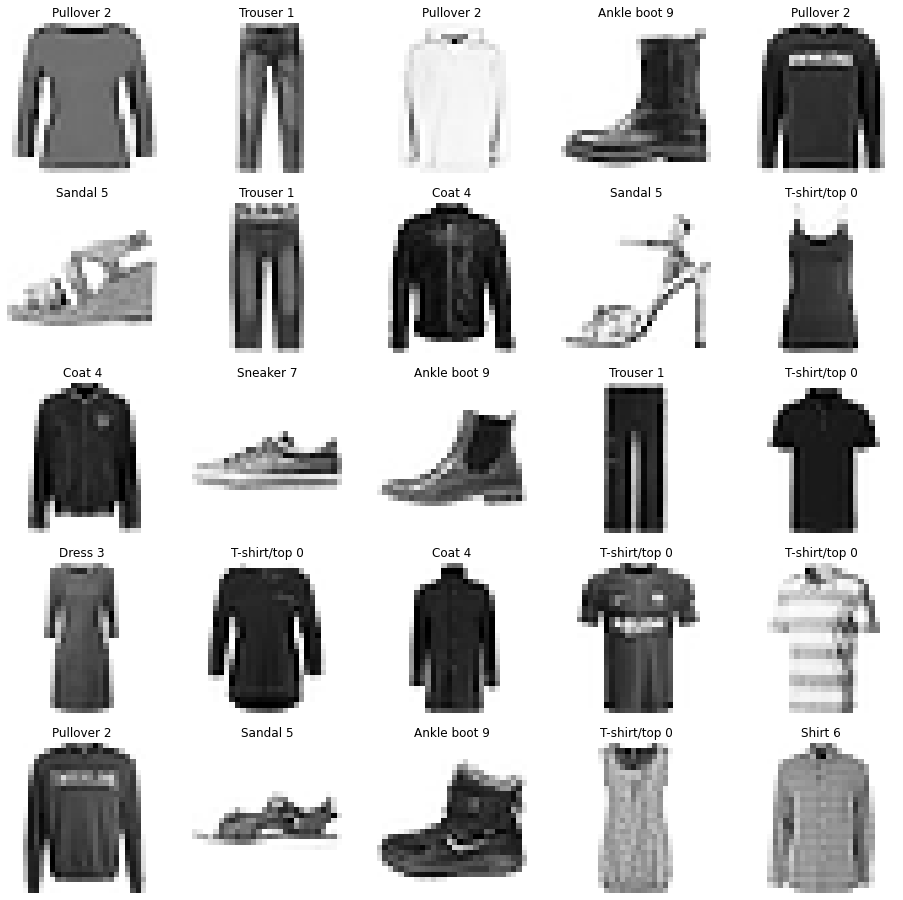

In [9]:
# for all image figure size
plt.figure(figsize=(16,16))

# show 25 images randomly
j = 1
for i in np.random.randint(0, 1000, 25):
    # in 1 place show 25 images 5 rows & 5 columns & j = value = (5,5,j)
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off') # off the axis
    plt.title('{} {}'.format(image_labels[y_train[i]], y_train[i]))


### Change data dimensions becasuse convcation neural network(CNN) get 4 dimensions array

In [10]:
# check dimensions
print("Old image data dimensions are -> {} is x_train data dims, {} is x_test data dims ".format(X_train.ndim, X_test.ndim))
print('Shape of x_train -> ',X_train.shape)

Old image data dimensions are -> 3 is x_train data dims, 3 is x_test data dims 
Shape of x_train ->  (60000, 28, 28)


In [11]:
# now 3dim data convert into 4dim.
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("Updated image data dimensions are -> {} is x_train data dims, {} is x_test data dims ".format(X_train.ndim, X_test.ndim))
print('Updated Shape of x_train -> ',X_train.shape)

Updated image data dimensions are -> 4 is x_train data dims, 4 is x_test data dims 
Updated Shape of x_train ->  (60000, 28, 28, 1)


### Feature Scaling 

In [12]:
# fetch scale b/w 0 to 1.
X_train = X_train/255 # why 255 ? because image matrix data b/w 0 to 255.
X_test = X_test/255

In [13]:
# show first scalable image data
print('First Scalable image -> \n ', X_train[0])

First Scalable image -> 
  [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.    

### Split Dataset into train Set and validate Set

-> Validation set actually can be regarded as a part of training set, because it is used to build your model, neural networks or others. It is usually used for parameter selection and to avoild overfitting. ... Thus a validation set, which is independant from the training set, is used for parameter selection.

In [14]:
from sklearn.model_selection import train_test_split
X_train_data, X_validate_data, y_train_data, y_validate_data = train_test_split(X_train, y_train, test_size=0.2, random_state=2020) 
# test_size=0.2 means  20% data for validation set & 80% for training Set.

In [15]:
# show training data shape
X_train_data.shape, y_train_data.shape

((48000, 28, 28, 1), (48000,))

In [16]:
# show Validation data shape
X_validate_data.shape, y_validate_data.shape

((12000, 28, 28, 1), (12000,))

### Convolutional Neural Network-Model Building

In [17]:
cnn_model = keras.models.Sequential([
                                     # here add all layers like convo, pooling, fc(flatten), dense...,

                                     # 1. layer is convolution layer, we can use -> 32 filtures , -> 3(row,col)kernal size, -> stride(1 row, 1 col), 
                                     # -> if image size(row & col) not perfect then zero padding set is valid
                                     # -> activation fun is relu because relu is negative value denoted by 0, positive value denoted by same positive value,
                                     # -> image input size is 28 row, 28 col, 1 color channel(if rgb color so we use 3 channel) """

                                     keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),

                                     # 2. Max pooling Layer pass pool size 2 row, 2 col
                                     keras.layers.MaxPool2D(pool_size=(2,2)),

                                     # 3. matrix convert into vector/1d array 
                                     keras.layers.Flatten(),

                                     # now add neural network
                                     # 1. input layer
                                     keras.layers.Dense(units=128, activation='relu'),
                                     # 2. output layer
                                     keras.layers.Dense(units=10, activation='softmax'),                                                                                                                                               
])

In [18]:
# check model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compile model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

'''
optimizer-> The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. 
Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
The learning rate determines how fast the optimal weights for the model are calculated. 
A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer. 

loss-> to find error rate.
We will use ‘categorical_crossentropy’ for our loss function. 
This is the most common choice for classification. A lower score indicates that the model is performing better.

metrics=['accuracy'] ->To make things even easier to interpret, 
we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

'''

"\noptimizer-> The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. \nAdam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.\nThe learning rate determines how fast the optimal weights for the model are calculated. \nA smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer. \n\nloss-> to find error rate.\nWe will use ‘categorical_crossentropy’ for our loss function. \nThis is the most common choice for classification. A lower score indicates that the model is performing better.\n\nmetrics=['accuracy'] ->To make things even easier to interpret, \nwe will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.\n\n"

In [20]:
# train model
cnn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=512, verbose=1, validation_data=(X_validate_data, y_validate_data))

'''
epochs-> The number of epochs is the number of times the model will cycle through the data. 
The more epochs we run, the more the model will improve, up to a certain point.
After that point, the model will stop improving during each epoch. For our model, 
we will set the number of epochs to 3.

batch_size-> number of samples per gradient update.

validation_data-> For our validation data, we will use the test set provided to us in our dataset,
which we have split into X_test and y_test.
'''

Epoch 1/10
94/94 [==============================] - 31s 22ms/step - loss: 0.9590 - accuracy: 0.6782 - val_loss: 0.4387 - val_accuracy: 0.8478
Epoch 2/10
94/94 [==============================] - 1s 16ms/step - loss: 0.4152 - accuracy: 0.8555 - val_loss: 0.3743 - val_accuracy: 0.8706
Epoch 3/10
94/94 [==============================] - 1s 16ms/step - loss: 0.3540 - accuracy: 0.8735 - val_loss: 0.3662 - val_accuracy: 0.8697
Epoch 4/10
94/94 [==============================] - 1s 16ms/step - loss: 0.3141 - accuracy: 0.8889 - val_loss: 0.3285 - val_accuracy: 0.8846
Epoch 5/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2844 - accuracy: 0.8999 - val_loss: 0.3025 - val_accuracy: 0.8938
Epoch 6/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2681 - accuracy: 0.9059 - val_loss: 0.3044 - val_accuracy: 0.8926
Epoch 7/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2587 - accuracy: 0.9082 - val_loss: 0.2806 - val_accuracy: 0.9025
Epoch 8/10
9

'\nepochs-> The number of epochs is the number of times the model will cycle through the data. \nThe more epochs we run, the more the model will improve, up to a certain point.\nAfter that point, the model will stop improving during each epoch. For our model, \nwe will set the number of epochs to 3.\n\nbatch_size-> number of samples per gradient update.\n\nvalidation_data-> For our validation data, we will use the test set provided to us in our dataset,\nwhich we have split into X_test and y_test.\n'

### Test Model

In [21]:
cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
# this image belong to 9th class because 9th class probability is high.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97]],
      dtype=float32)

In [22]:
# fetch max value from array
np.argmax(cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

9

In [23]:
# check y_test label value and fetched array value
y_test[0]

9

In [24]:
# prediction data
y_pred = cnn_model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.08, 0.02, 0.  ]], dtype=float32)

In [25]:
# model Evaluate(find accuracy of testing data)
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2841 - accuracy: 0.8940


[0.28407540917396545, 0.8939999938011169]

### Visualize Output

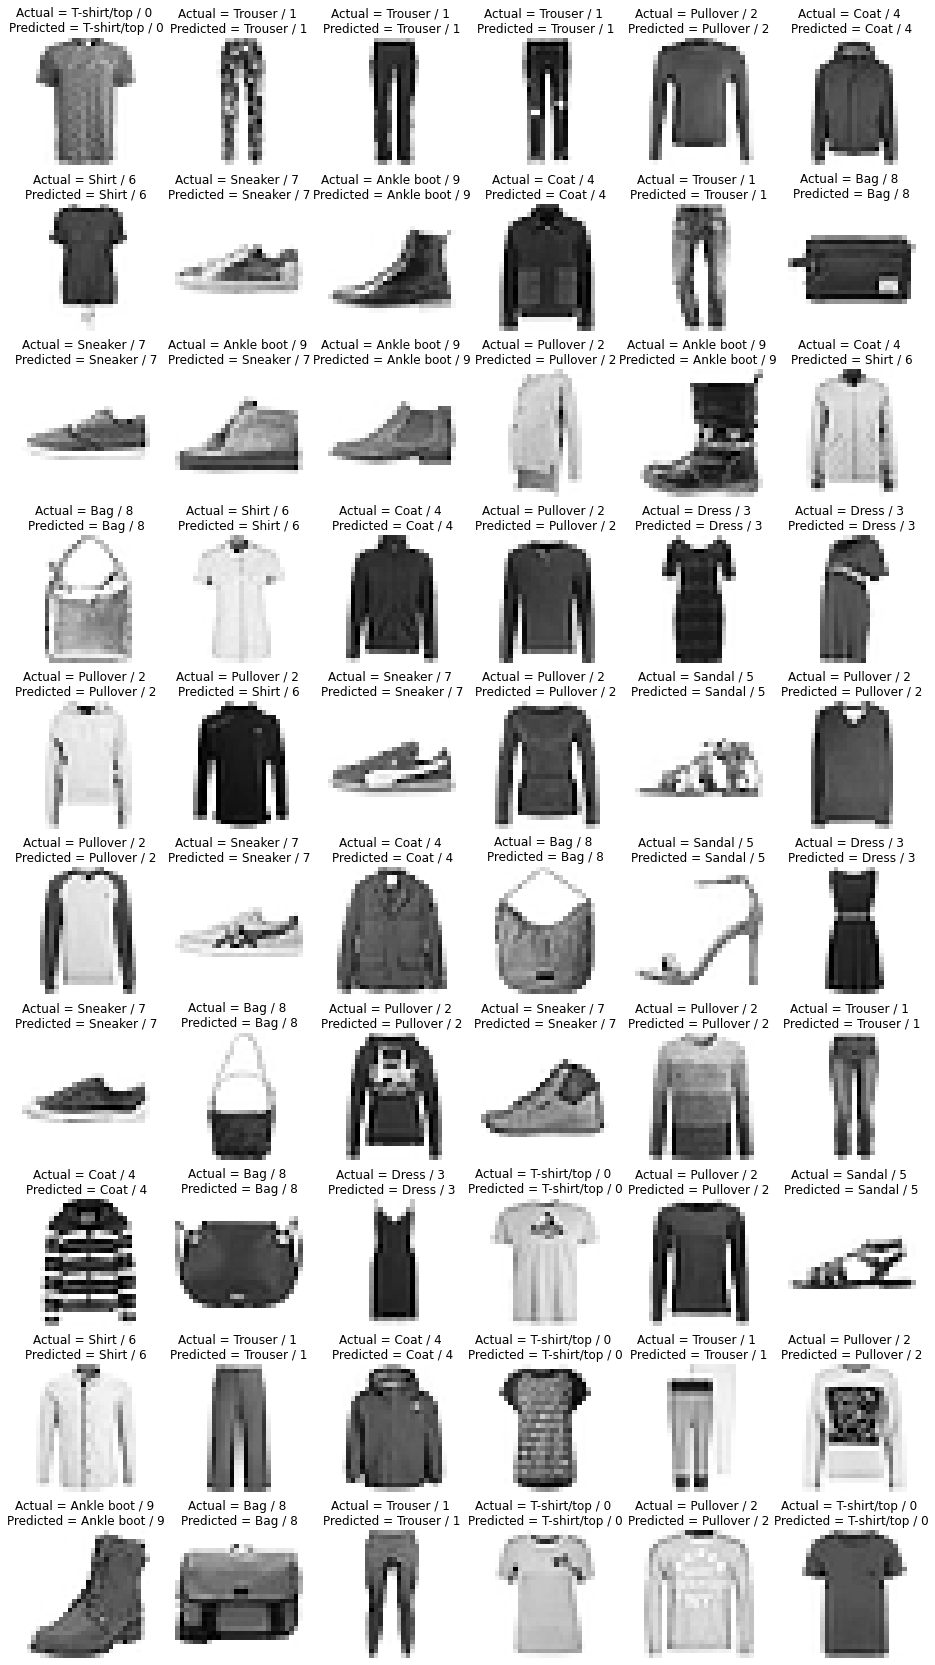

In [26]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10, 6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(image_labels[y_test[i]], y_test[i], image_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


### Confusion Matrix

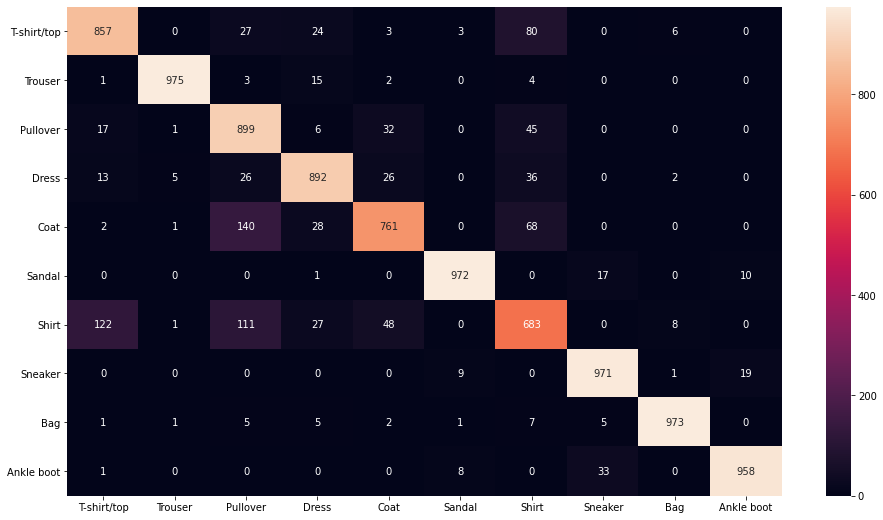

In [27]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm using heatmap
sns.heatmap(cm, annot=True, fmt='d', xticklabels=image_labels, yticklabels=image_labels )

### Classification Report

In [28]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=image_labels)
print("Classification Report are -> \n ",cr)

Classification Report are -> 
                precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.90      0.81      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.87      0.76      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



### Save Model

In [29]:
# 1. save in google colab
cnn_model.save('Fashion_classification_cnn_model.h5')

In [30]:
# 2. save in google drive
drive_folder_path = '/content/drive/MyDrive/Colab Saved Models/Fashion_classification_cnn_model.h5'
cnn_model.save(drive_folder_path)

### Load Models

In [31]:
# this model load from google drive if you can load model from colab then pass only model name.
model_deploy = keras.models.load_model('/content/drive/MyDrive/Colab Saved Models/Fashion_classification_cnn_model.h5')

### now check model is perfectly working or not ?

In [32]:
model_deploy.predict(X_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.08, 0.02, 0.  ]], dtype=float32)

In [33]:
# precdict single image
model_deploy.predict(np.expand_dims(X_test[0], axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97]],
      dtype=float32)

In [34]:
# get labael of high probability
np.argmax(model_deploy.predict(np.expand_dims(X_test[0], axis=0)))

9

## Convolutional Neural Network-Building Complex Model for Improve accuracy of model

In [35]:
# add many layers 
cnn1_1_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                                     keras.layers.MaxPool2D(pool_size=(2,2)),

                                     keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2,2), padding='same',activation= 'relu', input_shape=[28,28,1]),
                                     keras.layers.MaxPool2D(pool_size=(2,2)),

                                     keras.layers.Flatten(),

                                     # neural network input layer
                                     keras.layers.Dense(units=128, activation='relu'),
                                     # dropout fun to regularize data or which helps prevent overfitting.
                                     keras.layers.Dropout(0.25),
                                     # 1st hidden layer
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     # 2nd hidden layer
                                     keras.layers.Dense(units=128, activation='relu'),
                                     # output layer
                                     keras.layers.Dense(units=10, activation='softmax'),                                                                                                                                               
])

In [36]:
# compile model
cnn1_1_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
# train model
cnn1_1_model.fit(X_train_data, y_train_data, epochs=40, batch_size=512, verbose=1, validation_data=(X_validate_data, y_validate_data))

Epoch 1/40
94/94 [==============================] - 3s 22ms/step - loss: 1.5240 - accuracy: 0.4529 - val_loss: 0.5903 - val_accuracy: 0.7723
Epoch 2/40
94/94 [==============================] - 2s 18ms/step - loss: 0.5881 - accuracy: 0.7807 - val_loss: 0.4733 - val_accuracy: 0.8280
Epoch 3/40
94/94 [==============================] - 2s 18ms/step - loss: 0.4884 - accuracy: 0.8220 - val_loss: 0.4294 - val_accuracy: 0.8401
Epoch 4/40
94/94 [==============================] - 2s 18ms/step - loss: 0.4366 - accuracy: 0.8425 - val_loss: 0.3834 - val_accuracy: 0.8591
Epoch 5/40
94/94 [==============================] - 2s 18ms/step - loss: 0.3877 - accuracy: 0.8603 - val_loss: 0.3693 - val_accuracy: 0.8649
Epoch 6/40
94/94 [==============================] - 2s 18ms/step - loss: 0.3671 - accuracy: 0.8680 - val_loss: 0.3411 - val_accuracy: 0.8723
Epoch 7/40
94/94 [==============================] - 2s 18ms/step - loss: 0.3398 - accuracy: 0.8771 - val_loss: 0.3343 - val_accuracy: 0.8760
Epoch 8/40
94

In [38]:
# model Evaluate(find accuracy of testing data)
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2841 - accuracy: 0.8940


[0.28407540917396545, 0.8939999938011169]

## More Complex Cnn Model

In [39]:
# add many layers 
cnn1_2_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                                     keras.layers.MaxPool2D(pool_size=(2,2)),

                                     keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same',activation= 'relu', input_shape=[28,28,1]),
                                     keras.layers.MaxPool2D(pool_size=(2,2)),

                                     keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same',activation= 'relu', input_shape=[28,28,1]),
                                     keras.layers.MaxPool2D(pool_size=(2,2)),

                                     keras.layers.Flatten(),

                                     # neural network input layer
                                     keras.layers.Dense(units=128, activation='relu'),
                                     # dropout fun to regularize data or which helps prevent overfitting.
                                     keras.layers.Dropout(0.25),
                                     # 1st hidden layer
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.5),
                                     # 2nd hidden layer
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     # 3rd hidden layer
                                     keras.layers.Dense(units=128, activation='relu'),
                                     keras.layers.Dropout(0.10),
                                     # output layer
                                     keras.layers.Dense(units=10, activation='softmax'),                                                                                                                                               
])

In [40]:
# compile model
cnn1_2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train model
cnn1_2_model.fit(X_train_data, y_train_data, epochs=50, batch_size=512, verbose=1, validation_data=(X_validate_data, y_validate_data))

Epoch 1/50
94/94 [==============================] - 5s 45ms/step - loss: 1.6865 - accuracy: 0.3525 - val_loss: 0.6134 - val_accuracy: 0.7576
Epoch 2/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6214 - accuracy: 0.7648 - val_loss: 0.4815 - val_accuracy: 0.8173
Epoch 3/50
94/94 [==============================] - 4s 39ms/step - loss: 0.4900 - accuracy: 0.8188 - val_loss: 0.4085 - val_accuracy: 0.8492
Epoch 4/50
94/94 [==============================] - 4s 39ms/step - loss: 0.4152 - accuracy: 0.8521 - val_loss: 0.3829 - val_accuracy: 0.8609
Epoch 5/50
94/94 [==============================] - 4s 39ms/step - loss: 0.3755 - accuracy: 0.8643 - val_loss: 0.3463 - val_accuracy: 0.8747
Epoch 6/50
94/94 [==============================] - 4s 39ms/step - loss: 0.3335 - accuracy: 0.8830 - val_loss: 0.3309 - val_accuracy: 0.8832
Epoch 7/50
94/94 [==============================] - 4s 39ms/step - loss: 0.3138 - accuracy: 0.8876 - val_loss: 0.3165 - val_accuracy: 0.8901
Epoch 8/50
94

In [ ]:
# model Evaluate(find accuracy of testing data)
cnn1_2_model.evaluate(X_test, y_test)

# Thank You !